In [1]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import cross_val_score, GridSearchCV,\
ShuffleSplit, learning_curve, cross_val_predict, RandomizedSearchCV,\
train_test_split, StratifiedShuffleSplit, KFold, StratifiedKFold

# optimum parameters
from imblearn.under_sampling import NearMiss
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report, roc_curve, average_precision_score
import collections
from collections import Counter
from sklearn.metrics import precision_recall_curve, confusion_matrix


import warnings
warnings.filterwarnings("ignore")

In [15]:
df = pd.read_csv('data.csv') # read file as dataframe

## EDA

In [3]:
df.head() #view head of dataframe

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,28,1,2,130,132,0,2,185,0,0.0,?,?,?,0
1,29,1,2,120,243,0,0,160,0,0.0,?,?,?,0
2,29,1,2,140,?,0,0,170,0,0.0,?,?,?,0
3,30,0,1,170,237,0,1,170,0,0.0,?,?,6,0
4,31,0,2,100,219,0,1,150,0,0.0,?,?,?,0


In [4]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num       '],
      dtype='object')

### Meaning of the data :


**cp**: chest pain type

-- Value 1: typical angina

-- Value 2: atypical angina

-- Value 3: non-anginal pain

-- Value 4: asymptomatic

**trestbps**: resting blood pressure (in mm Hg on admission to the
hospital)

**chol**: serum cholestoral in mg/dl

**fbs**: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)


**restecg**: resting electrocardiographic results

-- Value 0: normal

-- Value 1: having ST-T wave abnormality (T wave inversions and/or ST
elevation or depression of > 0.05 mV)

-- Value 2: showing probable or definite left ventricular hypertrophy

**thalach**: maximum heart rate achieved

**exang**: exercise induced angina (1 = yes; 0 = no)


**oldpeak** = ST depression induced by exercise relative to rest

**slope**: the slope of the peak exercise ST segment

-- Value 1: upsloping

-- Value 2: flat

-- Value 3: downsloping

**ca**: number of major vessels (0-3) colored by flourosopy

**thal**: 3 = normal; 6 = fixed defect; 7 = reversable defect

**num**: diagnosis of heart disease (angiographic disease status)

-- Value 0: < 50% diameter narrowing

-- Value 1: > 50% diameter narrowing (in any major vessel: attributes 59 through 68 are vessels)

In [5]:
df.rename(columns = {'num       ': 'num'}, inplace = True )

df.num.value_counts()/len(df)

0    0.639456
1    0.360544
Name: num, dtype: float64

In [6]:
cols = ['sex', 'cp', 'fbs', 'restecg',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']

con_cols = ['chol', 'thalach', 'trestbps']

In [7]:
for feature in cols:
    print(df[feature].value_counts()/len(df)*100)
    print('________________')

1    72.44898
0    27.55102
Name: sex, dtype: float64
________________
4    41.836735
2    36.054422
3    18.367347
1     3.741497
Name: cp, dtype: float64
________________
0    90.476190
1     6.802721
?     2.721088
Name: fbs, dtype: float64
________________
0    79.931973
1    17.687075
2     2.040816
?     0.340136
Name: restecg, dtype: float64
________________
0    69.387755
1    30.272109
?     0.340136
Name: exang, dtype: float64
________________
0.0    64.285714
1.0    13.945578
2.0    10.544218
1.5     5.442177
3.0     3.061224
2.5     1.020408
0.5     0.680272
0.8     0.340136
5.0     0.340136
4.0     0.340136
Name: oldpeak, dtype: float64
________________
?    64.625850
2    30.952381
1     4.081633
3     0.340136
Name: slope, dtype: float64
________________
?    98.979592
0     1.020408
Name: ca, dtype: float64
________________
?    90.476190
7     3.741497
6     3.401361
3     2.380952
Name: thal, dtype: float64
________________
0    63.945578
1    36.054422
Name: num, dty

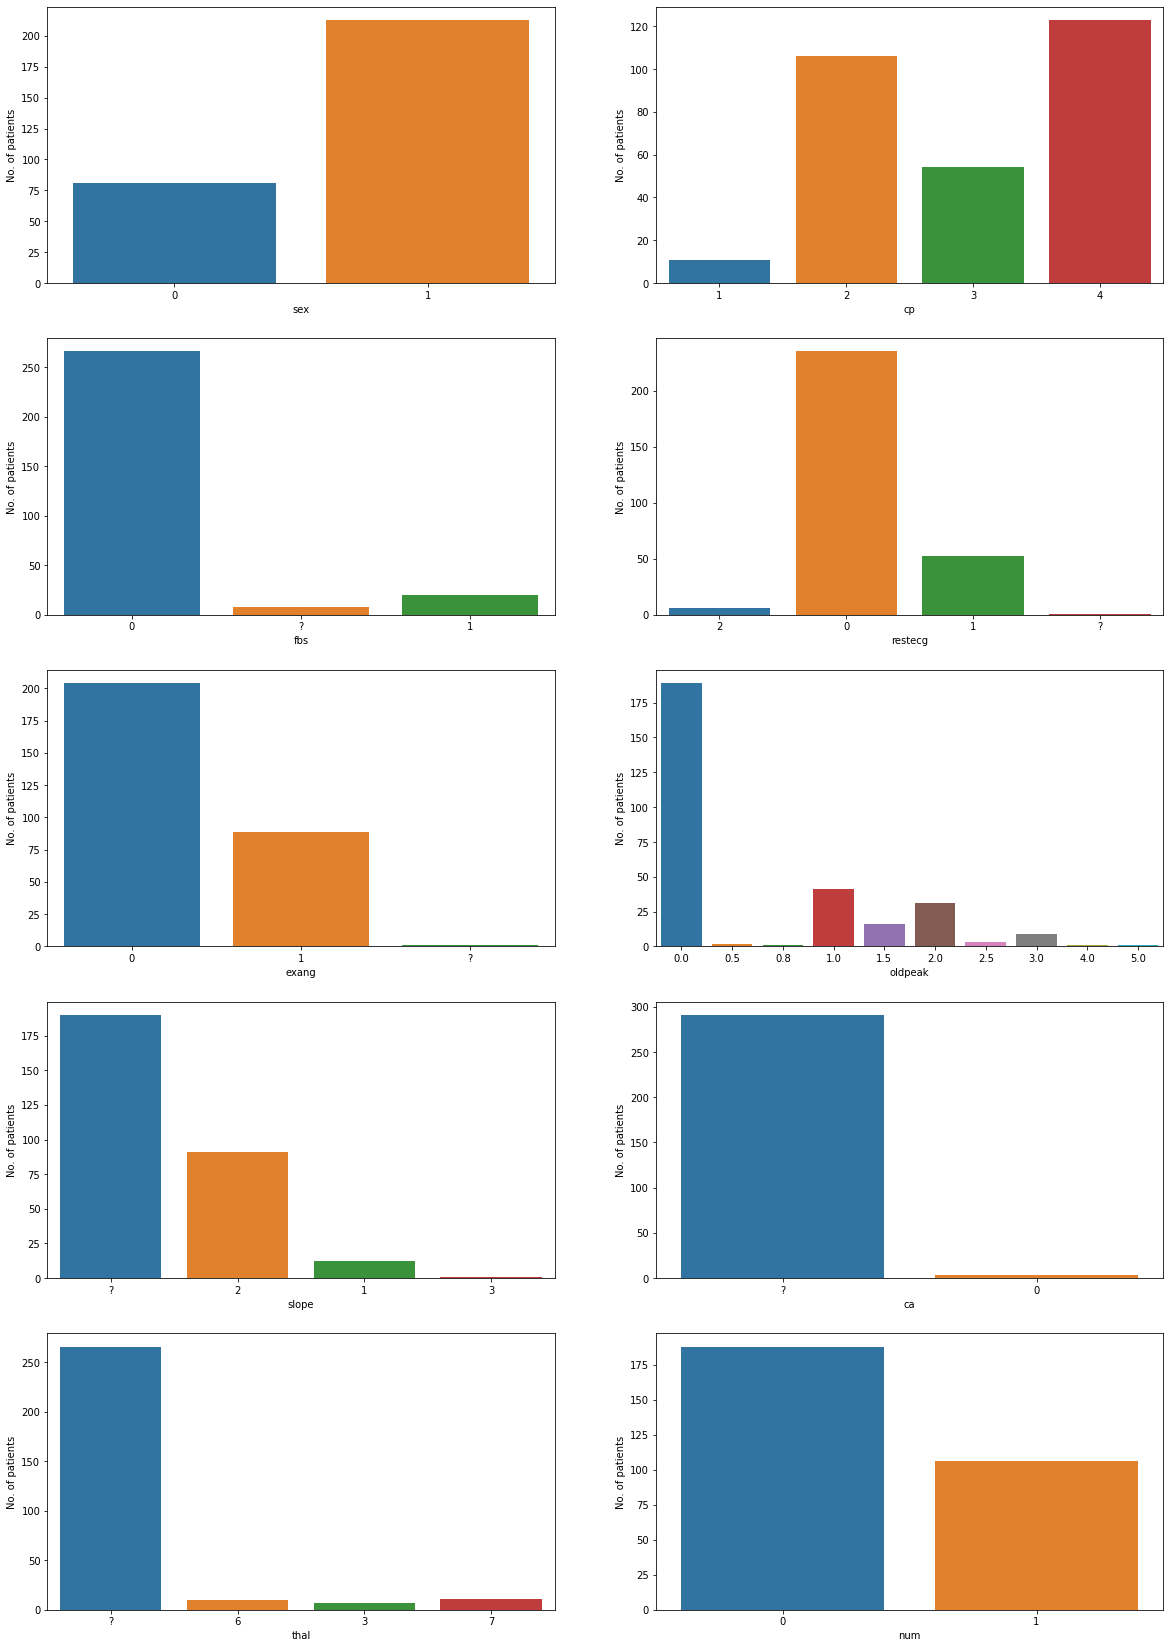

In [8]:

fig = plt.figure(figsize=(20,60))
for i, j in enumerate(cols):
    axj = fig.add_subplot(10, 2, i+1)
    sns.countplot(x = j, data = df)
    # data.groupby(j).plot(x = j, y = kind='bar', ax = axj)#, stacked=True) 
    plt.ylabel('No. of patients')
    plt.xlabel(j)

In [9]:
for j in cols[:-1]:
   print(pd.crosstab(index = df[j], columns = df['num']))
   print('__________________')

num    0   1
sex         
0     69  12
1    119  94
__________________
num   0   1
cp         
1     7   4
2    98   8
3    43  11
4    40  83
__________________
num    0   1
fbs         
0    175  91
1      7  13
?      6   2
__________________
num        0   1
restecg         
0        150  85
1         33  19
2          5   1
?          0   1
__________________
num      0   1
exang         
0      168  36
1       19  70
?        1   0
__________________
num        0   1
oldpeak         
0.0      157  32
0.5        2   0
0.8        1   0
1.0       17  24
1.5        3  13
2.0        7  24
2.5        0   3
3.0        1   8
4.0        0   1
5.0        0   1
__________________
num      0   1
slope         
1       12   0
2       19  72
3        0   1
?      157  33
__________________
num    0    1
ca           
0      2    1
?    186  105
__________________
num     0   1
thal         
3       7   0
6       4   6
7       4   7
?     173  93
__________________


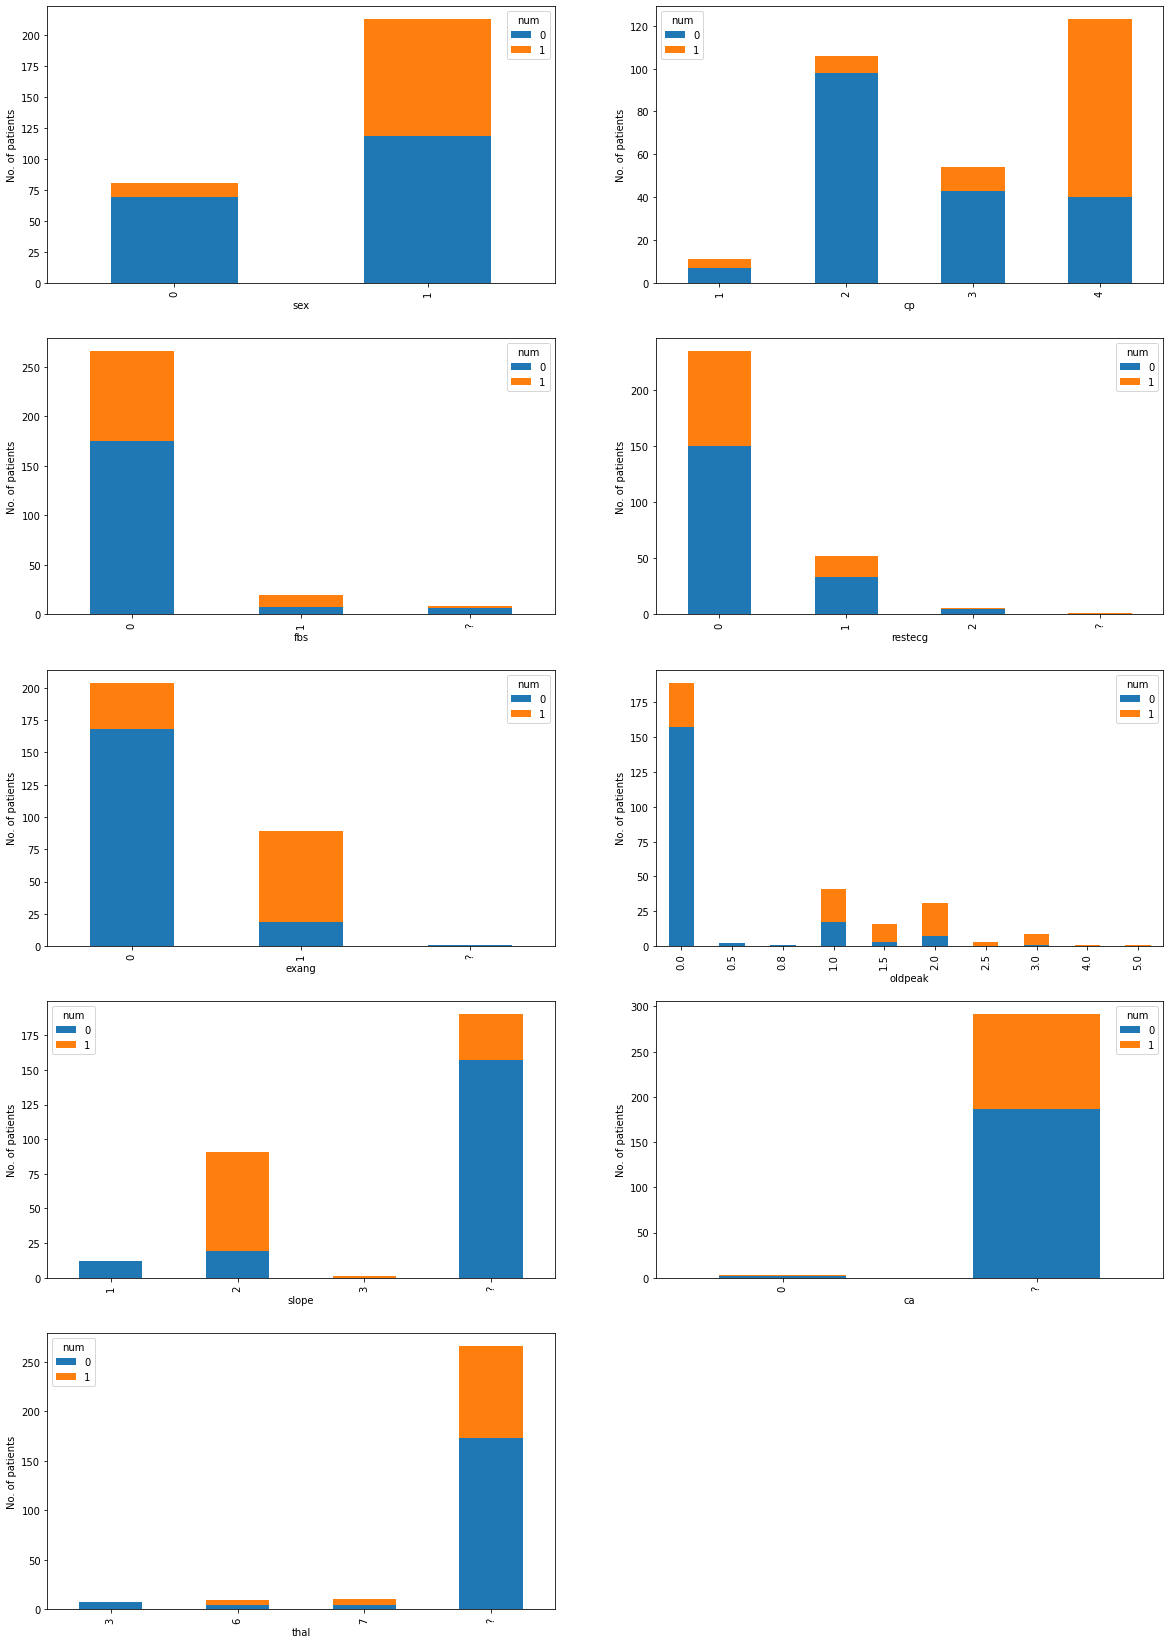

In [10]:
fig = plt.figure(figsize=(20,60))

for i, j in enumerate(cols[:-1]):
    axj = fig.add_subplot(10, 2, i+1)
    temp = pd.crosstab(index = df[j], columns = df['num'])
    temp.plot(kind='bar', ax = axj, stacked=True)

    # data.groupby([j, 'Churn']).size().unstack().plot(kind='bar', ax = axj, stacked=True) ## this works also
    plt.ylabel('No. of patients')
    plt.xlabel(j)

In [12]:
help(pd.crosstab)

Help on function crosstab in module pandas.core.reshape.pivot:

crosstab(index, columns, values=None, rownames=None, colnames=None, aggfunc=None, margins=False, margins_name: str = 'All', dropna: bool = True, normalize=False) -> 'DataFrame'
    Compute a simple cross tabulation of two (or more) factors. By default
    computes a frequency table of the factors unless an array of values and an
    aggregation function are passed.
    
    Parameters
    ----------
    index : array-like, Series, or list of arrays/Series
        Values to group by in the rows.
    columns : array-like, Series, or list of arrays/Series
        Values to group by in the columns.
    values : array-like, optional
        Array of values to aggregate according to the factors.
        Requires `aggfunc` be specified.
    rownames : sequence, default None
        If passed, must match number of row arrays passed.
    colnames : sequence, default None
        If passed, must match number of column arrays passed.

## rename the num values to meaningful names

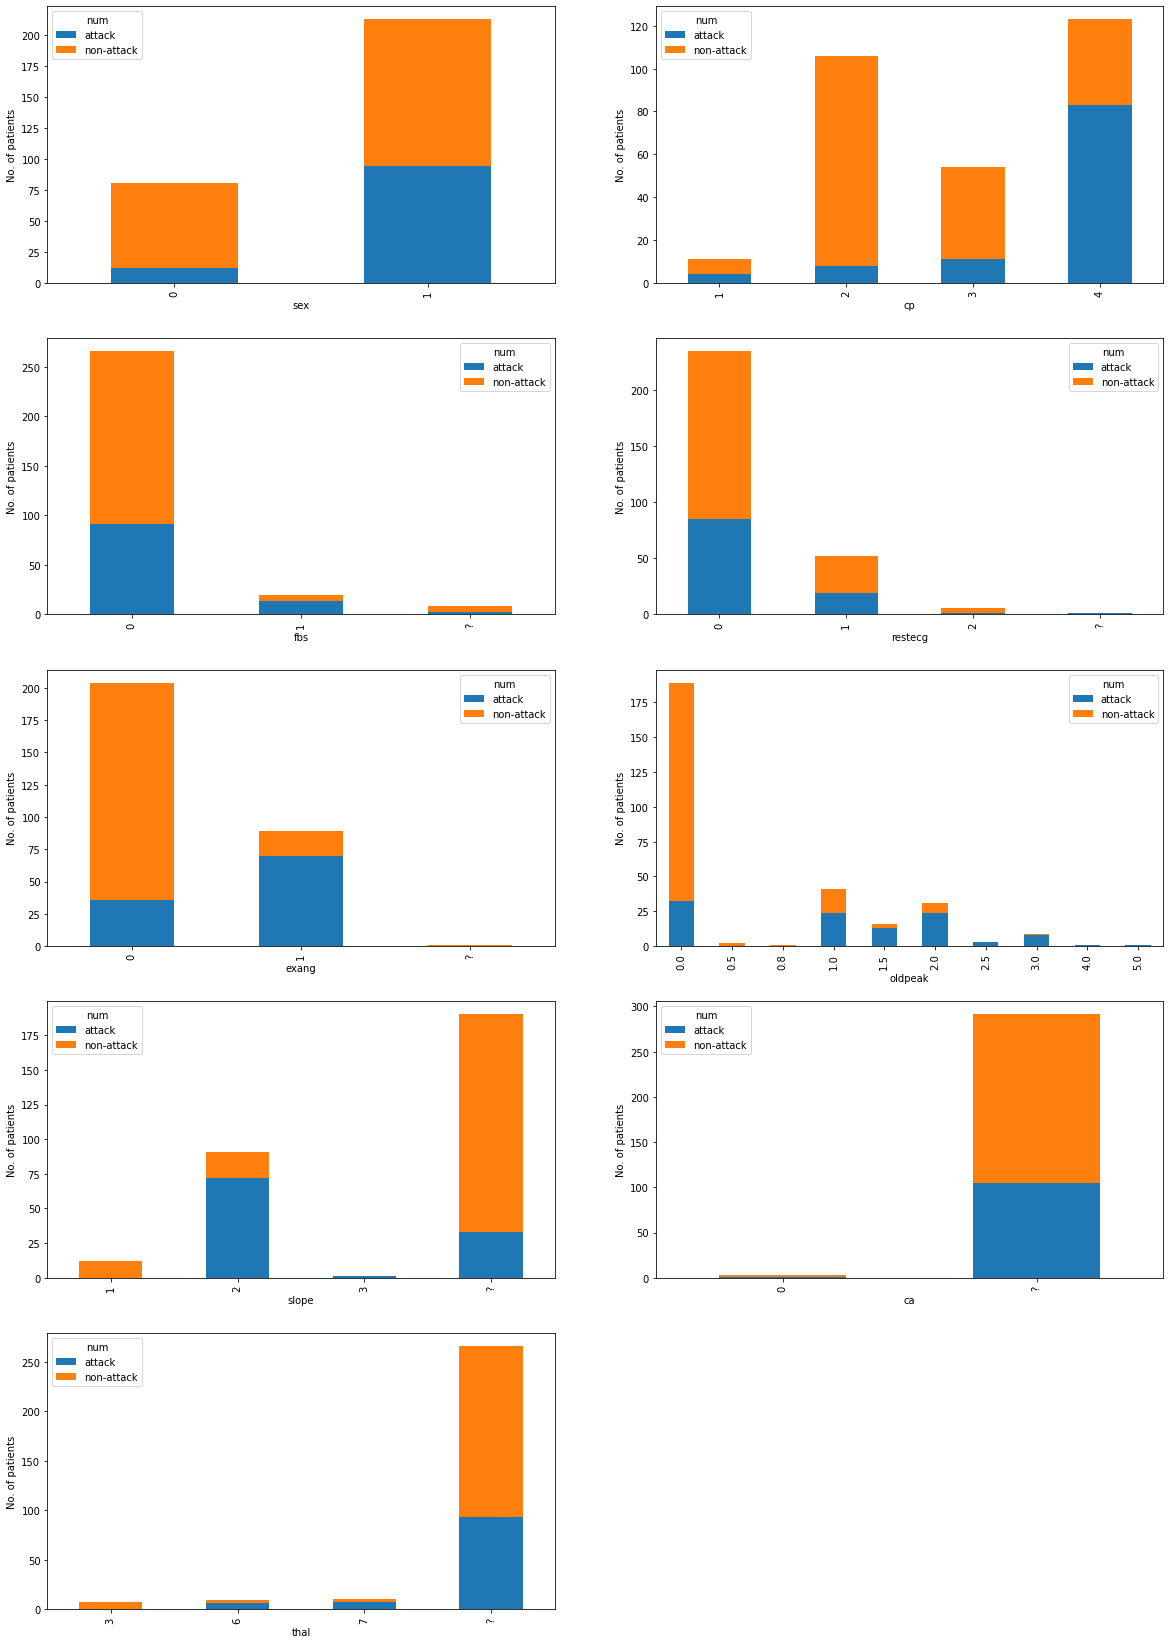

In [11]:
## your code here
df.num = df.num.apply(lambda x: 'attack' if x==1 else 'non-attack')


fig = plt.figure(figsize=(20,60))

for i, j in enumerate(cols[:-1]):
    axj = fig.add_subplot(10, 2, i+1)
    temp = pd.crosstab(index = df[j], columns = df['num'])
    temp.plot(kind='bar', ax = axj, stacked=True)

    # data.groupby([j, 'Churn']).size().unstack().plot(kind='bar', ax = axj, stacked=True) ## this works also
    plt.ylabel('No. of patients')
    plt.xlabel(j)

In [11]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps     object
chol         object
fbs          object
restecg      object
thalach      object
exang        object
oldpeak     float64
slope        object
ca           object
thal         object
num           int64
dtype: object

## **replace the not available data with zeros in the continuous features**

## **convert the object dtype to numeric dtype**

In [15]:
## your code here

from ast import literal_eval

for col in con_cols:
    df[col] = df[col].replace('?', '0')
    df[col] = df[col].apply(literal_eval)



In [16]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs          object
restecg      object
thalach       int64
exang        object
oldpeak     float64
slope        object
ca           object
thal         object
num           int64
dtype: object

## how to visualise categorical vs continous variables?

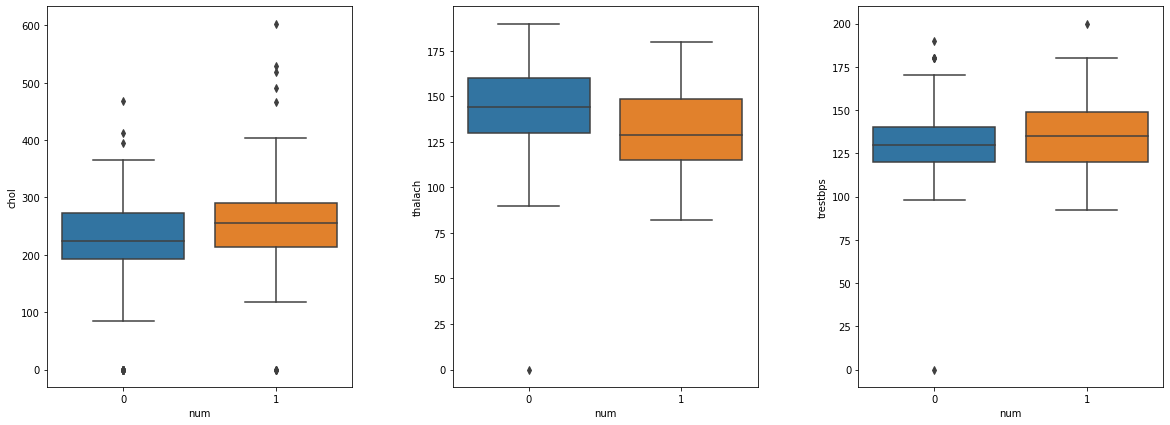

In [17]:
fig=plt.subplots(figsize=(20,7))
for i, j in enumerate(con_cols):
    plt.subplot(1, 3, i+1)
    plt.subplots_adjust(hspace = 1, wspace= 0.33)
    sns.boxplot(x='num', y=j, data=df)

## missing values

**replace the missing values**

In [18]:
## your code here


df.replace("?",'0',inplace=True)

In [19]:
# numerical description of data
df.describe()

,age,sex,cp,trestbps,chol,thalach,oldpeak,num
count,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000
mean,47.826531,0.724490,2.982993,132.132653,231.224490,138.656463,0.586054,0.360544
std,7.811812,0.447533,0.965117,19.220459,93.655333,24.908180,0.908648,0.480977
min,28.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,42.000000,0.000000,2.000000,120.000000,198.000000,122.000000,0.000000,0.000000
50%,49.000000,1.000000,3.000000,130.000000,237.000000,140.000000,0.000000,0.000000
75%,54.000000,1.000000,4.000000,140.000000,277.000000,155.000000,1.000000,1.000000
max,66.000000,1.000000,4.000000,200.000000,603.000000,190.000000,5.000000,1.000000


In [20]:
# info on dataset (i.e. datatypes , entries, etc.)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       294 non-null    int64  
 1   sex       294 non-null    int64  
 2   cp        294 non-null    int64  
 3   trestbps  294 non-null    int64  
 4   chol      294 non-null    int64  
 5   fbs       294 non-null    object 
 6   restecg   294 non-null    object 
 7   thalach   294 non-null    int64  
 8   exang     294 non-null    object 
 9   oldpeak   294 non-null    float64
 10  slope     294 non-null    object 
 11  ca        294 non-null    object 
 12  thal      294 non-null    object 
 13  num       294 non-null    int64  
dtypes: float64(1), int64(7), object(6)
memory usage: 32.3+ KB


In [21]:
# segment age and determine the distribution 

def segmentation(age):
    """
    segmented : {1 : (25:35), 2 : (35:45), 3 :(45:55), 4 :(55:65)}
    """
    if age > 25 and age < 35:
        return 1
    elif age >= 35 and age < 45 :
        return 2 
    elif age >= 45 and age < 55 :
        return 3 
    elif age >= 55 and age < 65 :
        return 4
    elif age >= 65 and age < 75:
        return 5
    
df["segmented_age"] = df['age'].apply(segmentation)

In [22]:
print(df['age'].max(),df['age'].min())

66 28


**visualize the ages**

<AxesSubplot:>

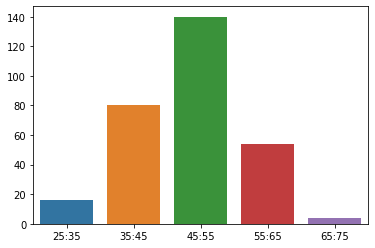

In [23]:
## your code here
sns.barplot(x = ["25:35","35:45","45:55","55:65","65:75"] , y = [a for a in df.groupby("segmented_age").count()['num']])

In [25]:
# prepare the data for classification

features = #  . . .
label = # . . . 

features = df.drop(['segmented_age','num'], axis=1)
label = df['num']

In [26]:
df.age

,age,sex,cp,trestbps,chol,thalach,oldpeak,num,segmented_age
age,1.000000,0.013618,0.145826,0.223962,0.045192,-0.434782,0.177707,0.159315,0.936603
sex,0.013618,1.000000,0.249875,0.119328,0.032668,-0.074347,0.118931,0.272781,0.038469
cp,0.145826,0.249875,1.000000,0.102235,0.117964,-0.330193,0.353109,0.505864,0.169538
trestbps,0.223962,0.119328,0.102235,1.000000,0.019643,-0.029041,0.151949,0.145436,0.213014
chol,0.045192,0.032668,0.117964,0.019643,1.000000,-0.092955,0.134158,0.202917,0.023899
thalach,-0.434782,-0.074347,-0.330193,-0.029041,-0.092955,1.000000,-0.314972,-0.298724,-0.419537
oldpeak,0.177707,0.118931,0.353109,0.151949,0.134158,-0.314972,1.000000,0.545700,0.168650
num,0.159315,0.272781,0.505864,0.145436,0.202917,-0.298724,0.545700,1.000000,0.161218
segmented_age,0.936603,0.038469,0.169538,0.213014,0.023899,-0.419537,0.168650,0.161218,1.000000


In [27]:
# Trying normal Kfold 


from sklearn.model_selection import KFold

kf = KFold(n_splits=5, random_state=None, shuffle=False) 

# split into train/test and convert to numpy arrays


# split into train/test
for train_index, test_index in kf.split(features, label):
    #print("Train:", train_index, "Test:", test_index)
    original_Ftrain, original_Ftest = features.iloc[train_index].values, features.iloc[test_index].values
    original_Ltrain, original_Ltest = label.iloc[train_index].values, label.iloc[test_index].values
    


################################


# label distribution and count
#check test and train distribution 
_, train_counts_label = np.unique(original_Ltrain, return_counts=True)
_, test_counts_label = np.unique(original_Ltest, return_counts=True)

print('Label Distributions: \n')
print(train_counts_label/ len(original_Ltrain))
print(test_counts_label/ len(original_Ltest))

Label Distributions: 

[0.79661017 0.20338983]
[1.]


## **What is wrong with the results?**

## **What can be the solution ?**



In [28]:


# your code here ..

# provide train/test indices to split data in train/test sets
# Generate test sets such that all contain the same distribution of classes, or as close as possible


skf = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

# split into train/test and convert to numpy arrays

######## your code here ########

# split into train/test

for train_index, test_index in skf.split(features, label):
    #print("Train:", train_index, "Test:", test_index)
    original_Ftrain, original_Ftest = features.iloc[train_index].values, features.iloc[test_index].values
    original_Ltrain, original_Ltest = label.iloc[train_index].values, label.iloc[test_index].values
   



#####################################

# label distribution and count
_, train_counts_label = np.unique(original_Ltrain, return_counts=True)
_, test_counts_label = np.unique(original_Ltest, return_counts=True)

print('Label Distributions: \n')
print(train_counts_label/ len(original_Ltrain))
print(test_counts_label/ len(original_Ltest))


Label Distributions: 

[0.63983051 0.36016949]
[0.63793103 0.36206897]


# Random Undersampling: Restoring balance

In [29]:

#The frac keyword argument specifies the fraction of rows to return in the random sample,
#so frac=1 means return all rows (in random order)

df = df.sample(frac=1)

heart_attack_df = df.loc[df['num'] == 1]
not_heart_attack_df = df.loc[df['num'] == 0][:106]

normal_distr_df = pd.concat([heart_attack_df, not_heart_attack_df])


new_df = normal_distr_df.sample(frac=1, random_state=42)

new_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,segmented_age
214,51,0,4,160,303,0,0,150,1,1.0,2,0,0,1,3
141,54,0,2,120,230,1,0,140,0,0.0,0,0,0,0,3
19,36,1,3,150,160,0,0,172,0,0.0,0,0,0,0,2
212,50,0,3,140,288,0,0,140,1,0.0,0,0,7,1,3
273,56,1,4,170,388,0,1,122,1,2.0,2,0,0,1,4


Distribution of the Classes in the subsample dataset
1    0.5
0    0.5
Name: num, dtype: float64


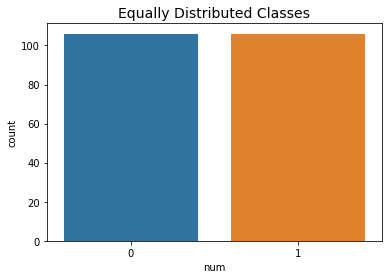

In [30]:
# Visualize equality
print('Distribution of the Classes in the subsample dataset')
print(new_df['num'].value_counts()/len(new_df))


sns.countplot('num', data=new_df)
plt.title('Equally Distributed Classes', fontsize=14)
plt.show()

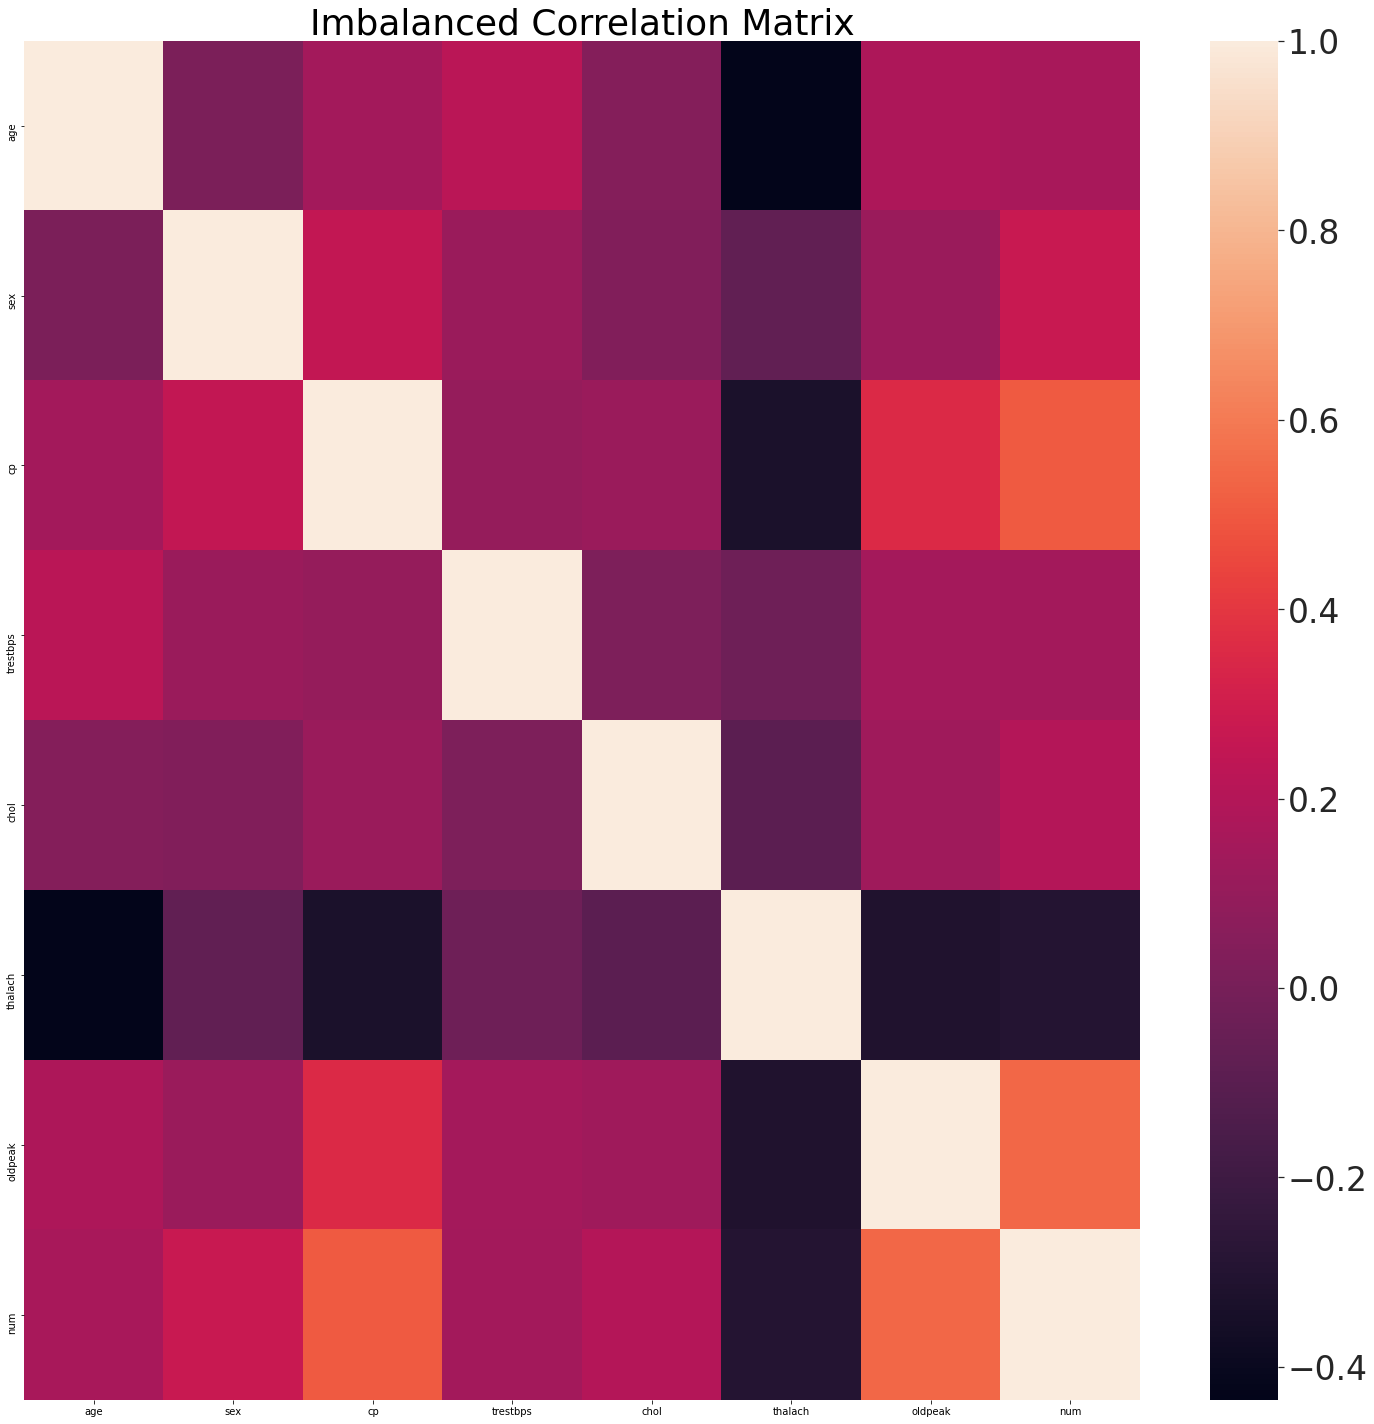

In [31]:
# heatmap of imbalanced dataframe
fig, ax = plt.subplots(figsize=(25,25))

corr = df.drop(['segmented_age'],axis=1).corr()
sns.set(font_scale=3)
sns.heatmap(data=corr, ax=ax, annot=False)
ax.set_title("Imbalanced Correlation Matrix")
plt.show()

**Visualize the num and age before and after undersampling and Notice the results**

In [ ]:

# num vs age before undersampling


sns.boxplot(x="num", y="age", data=df)

plt.show()

In [ ]:
# check that the distribution did not change

sns.boxplot(x="num", y="age", data=new_df)

plt.show()


# PCA (visualizing data)

**apply PCA with 2 components and visualize the data**

In [58]:

features = df.drop(['num','segmented_age'],inplace=False,axis=1)
label = df['num']

In [59]:
df.dtypes

age                int64
sex                int64
cp                 int64
trestbps           int64
chol               int64
fbs               object
restecg           object
thalach            int64
exang             object
oldpeak          float64
slope             object
ca                object
thal              object
num                int64
segmented_age      int64
dtype: object

In [60]:

from sklearn.decomposition import PCA
X = features.values
pca = PCA(n_components=2)
pca.fit(X)
x_pca = pca.transform(X)

Text(0, 0.5, 'Second Principal Component')

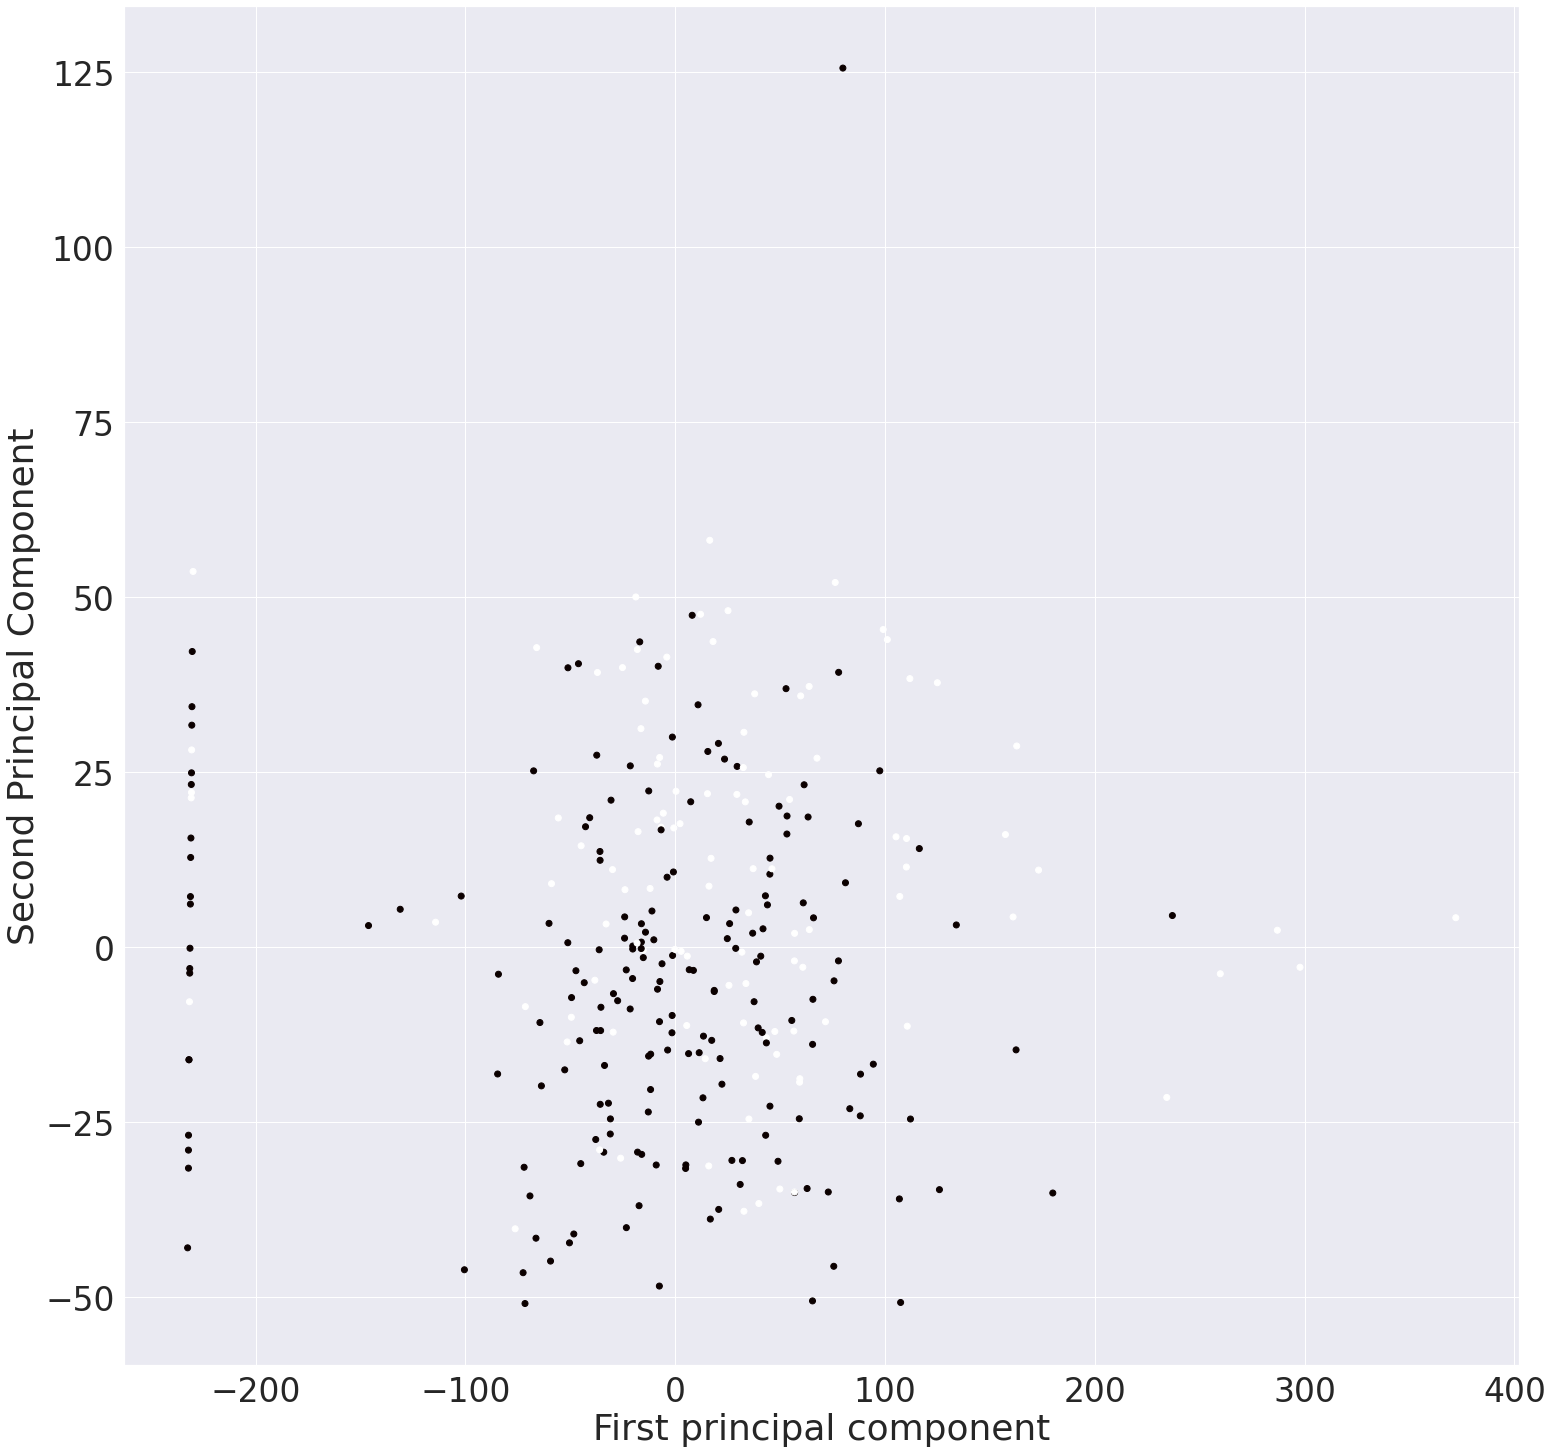

In [64]:
plt.figure(figsize=(25,25))
plt.scatter(x_pca[:,0],x_pca[:,1], c = label, cmap = 'hot' )
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

**can we apply a linear classifer on the pca results?**

## Classifiers Effectiveness in Undersampling

In [69]:
feature = new_df.drop(['num','segmented_age'], axis=1).values
label = new_df['num'].values

In [70]:
# data split into 0.8 train, 0.2 test
feature_train, feature_test, label_train, label_test = train_test_split(feature, label, test_size=0.2, random_state=42)

In [71]:
#comparison classifiers
classifiers = {
    "LogisiticRegression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(),
    "DecisionTreeClassifier": DecisionTreeClassifier()
}

In [72]:
#cross-validation scores
for key, classifier in classifiers.items():
    classifier.fit(feature_train, label_train)
    training_score = cross_val_score(classifier, feature_train, label_train, cv=5) #k-folds = 5
    print("Classifiers: ", classifier.__class__.__name__, "Has a training score of", round(training_score.mean(), 2) * 100, "% accuracy score")

    

Classifiers:  LogisticRegression Has a training score of 80.0 % accuracy score
Classifiers:  KNeighborsClassifier Has a training score of 53.0 % accuracy score
Classifiers:  SVC Has a training score of 66.0 % accuracy score
Classifiers:  DecisionTreeClassifier Has a training score of 69.0 % accuracy score


In [43]:
# search for optimum parameters for all classifiers


def best_param(model,param):
    """
    
    parameters: 
        model = classifier , 
        param = dictionary where its key is the hyperparameter and the value is the list of possiple values.
    
    
    return: Best hyperparamters combination
    
    Hint: use the GridSearch method
    """
    
    grid = GridSearchCV(model,param)
    grid.fit(feature_train,label_train)
    return grid.best_estimator_


    


# Logistic Regression 
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}


# log logistic regression with the optimum parameters
log_reg = best_param(LogisticRegression(), log_reg_params)

# K-NNB
knear_params = {"n_neighbors": list(range(2,5,1)), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

# log K-NNB with the optimum parameters
log_knnb = best_param(KNeighborsClassifier(), knear_params)

# Support Vector Classifier
svc_params = {'C': [0.5, 0.7, 0.9, 1], 'kernel': ['rbf', 'poly', 'sigmoid', 'linear']}

# log svc with the optimum parameters
log_svc = best_param(SVC(), svc_params)

# DecisionTree Classifier
tree_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,4,1)), 
              "min_samples_leaf": list(range(5,7,1))}

# log DT with the optimum parameters
log_DT = best_param(DecisionTreeClassifier(), tree_params)


# Case: Overfitting
log_reg_score = cross_val_score(log_reg, feature_train, label_train, cv=5)
print('Logistic Regression Cross Validation Score: ', round(log_reg_score.mean() * 100, 2).astype(str) + '%')


knnb_score = cross_val_score(log_knnb, feature_train, label_train, cv=5)
print('Knears Neighbors Cross Validation Score', round(knnb_score.mean() * 100, 2).astype(str) + '%')

svc_score = cross_val_score(log_svc, feature_train, label_train, cv=5)
print('Support Vector Classifier Cross Validation Score', round(svc_score.mean() * 100, 2).astype(str) + '%')

tree_score = cross_val_score(log_DT, feature_train, label_train, cv=5)
print('DecisionTree Classifier Cross Validation Score', round(tree_score.mean() * 100, 2).astype(str) + '%')

Logistic Regression Cross Validation Score:  81.05%
Knears Neighbors Cross Validation Score 53.89%
Support Vector Classifier Cross Validation Score 82.23%
DecisionTree Classifier Cross Validation Score 81.02%


In [44]:
# imbalanced data => undersample during cross-validation

undersample_features = df.drop(['num','segmented_age'], axis=1).values
undersample_label = df['num'].values

for train_index, test_index in skf.split(undersample_features, undersample_label):
    #print("Train:", train_index, "Test:", test_index)
    undersample_Ftrain, undersample_Ftest = undersample_features.iloc[train_index], undersample_features.iloc[test_index]
    undersample_Ltrain, undersample_Ltest = undersample_label.iloc[train_index], undersample_label.iloc[test_index]
    

undersample_accuracy = []
undersample_precision = []
undersample_recall = []
undersample_f1 = []

# Implement NearMiss Technique 
F_nearmiss, L_nearmiss = NearMiss().fit_sample(undersample_features.values, undersample_label.values)
#print('NearMiss Label Distribution: {}'.format(Counter(L_nearmiss)))

# Cross Validation

for train, test in skf.split(undersample_Ftrain, undersample_Ltrain):
    undersample_pipeline = imbalanced_make_pipeline(NearMiss(sampling_strategy='majority'), log_reg) # SMOTE happens during Cross Validation not before
    undersample_model = undersample_pipeline.fit(undersample_Ftrain[train], undersample_Ltrain[train])
    undersample_prediction = undersample_model.predict(undersample_Ftrain[test])
    
    undersample_accuracy.append(undersample_pipeline.score(original_Ftrain[test], original_Ltrain[test]))
    undersample_precision.append(precision_score(original_Ltrain[test], undersample_prediction))
    undersample_recall.append(recall_score(original_Ltrain[test], undersample_prediction))
    undersample_f1.append(f1_score(original_Ltrain[test], undersample_prediction))
    
print("undersampling accuracy :",undersample_accuracy )
print("undersampling precision :",undersample_precision )
print("undersampling recall :",undersample_recall )
print("undersampling f1 :",undersample_f1 )
       

undersampling accuracy : [0.9791666666666666, 0.9574468085106383, 0.8297872340425532, 0.723404255319149, 0.7659574468085106]
undersampling precision : [0.0, 0.0, 0.0, 0.4375, 1.0]
undersampling recall : [0.0, 0.0, 0.0, 0.2, 0.3617021276595745]
undersampling f1 : [0.0, 0.0, 0.0, 0.27450980392156865, 0.53125]


In [45]:
# plot learning curves for all classifiers
# wide gaps => overfitting i.e. high variance

def plot_learning_curve(estimators, F, L, ylim=None, cv=None, n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(50,25), sharey=True)
    
    if ylim is not None:
        plt.ylim(*ylim)
    c = 0
    classifiers = ["Logistic Regression","K-NNBs","Support Vector Classifier","Decision Tree Classifier"]
    axes = [ax1,ax2,ax3,ax4]
    
    for estimator in estimators :
        train_sizes, train_scores, test_scores = learning_curve(estimator, F, L, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
        train_scores_mean = np.mean(train_scores, axis=1)
        train_scores_std = np.std(train_scores, axis=1)
        test_scores_mean = np.mean(test_scores, axis=1)
        test_scores_std = np.std(test_scores, axis=1)
        axes[c].fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="#ff9124")
        axes[c].fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
        axes[c].plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
        axes[c].plot(train_sizes, test_scores_mean, 'o-', color="b", label="Cross-validation score")
        
        axes[c].set_title( str(classifiers[c] + " Learning Curve"), fontsize=30)
        axes[c].set_xlabel('Training size (m)')
        axes[c].set_ylabel('Score')
        axes[c].grid(True)
        axes[c].legend(loc="best")
        c+=1
    return plt

<module 'matplotlib.pyplot' from '/home/pasant/.local/lib/python3.8/site-packages/matplotlib/pyplot.py'>

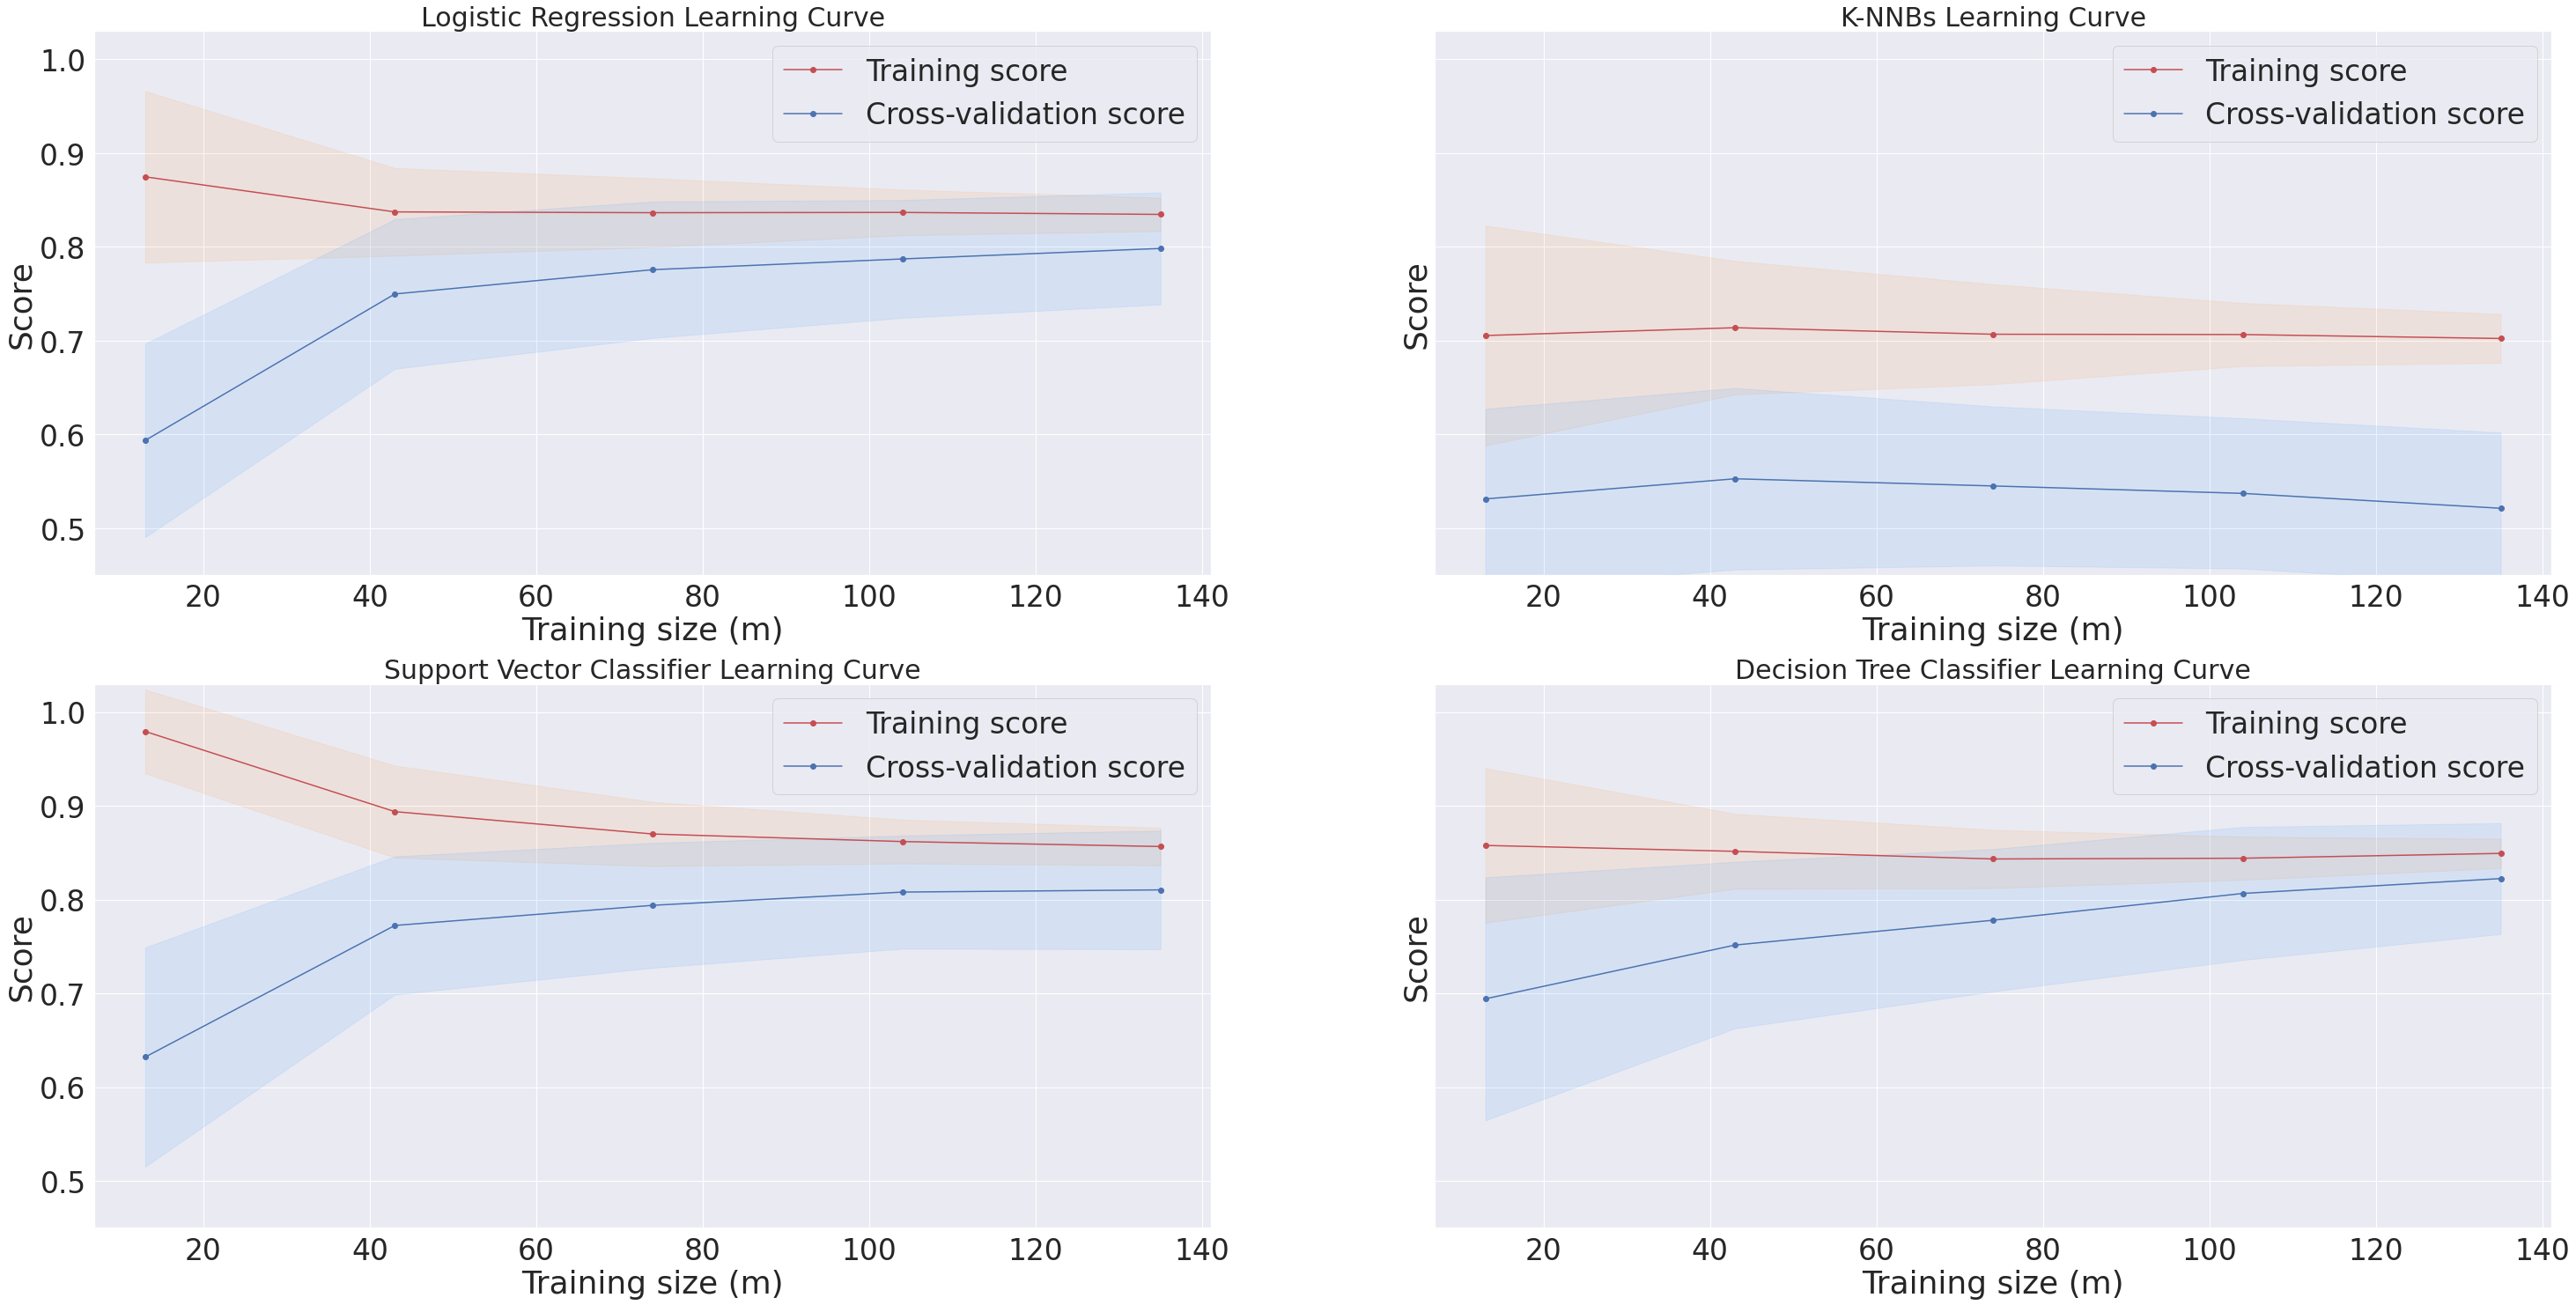

In [79]:
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=42)
estimators = [log_reg, log_knnb, log_svc, log_DT]
plot_learning_curve(estimators, feature_train, label_train, (0.45, 1.03), cv=cv, n_jobs=4)

In [47]:
# cross-validate predictions

log_reg_pred = cross_val_predict(log_reg, feature_train, label_train, cv=5, method="decision_function")

knnb_pred = cross_val_predict(log_knnb, feature_train, label_train, cv=5)

svc_pred = cross_val_predict(log_svc, feature_train, label_train, cv=5,method="decision_function")

tree_pred = cross_val_predict(log_DT, feature_train, label_train, cv=5)


print('Logistic Regression: ', roc_auc_score(label_train, log_reg_pred))
print('KNears Neighbors: ', roc_auc_score(label_train, knnb_pred))
print('Support Vector Classifier: ', roc_auc_score(label_train, svc_pred))
print('Decision Tree Classifier: ', roc_auc_score(label_train, tree_pred))

Logistic Regression:  0.8622334455667788
KNears Neighbors:  0.5440516273849607
Support Vector Classifier:  0.8707912457912458
Decision Tree Classifier:  0.8113075196408529


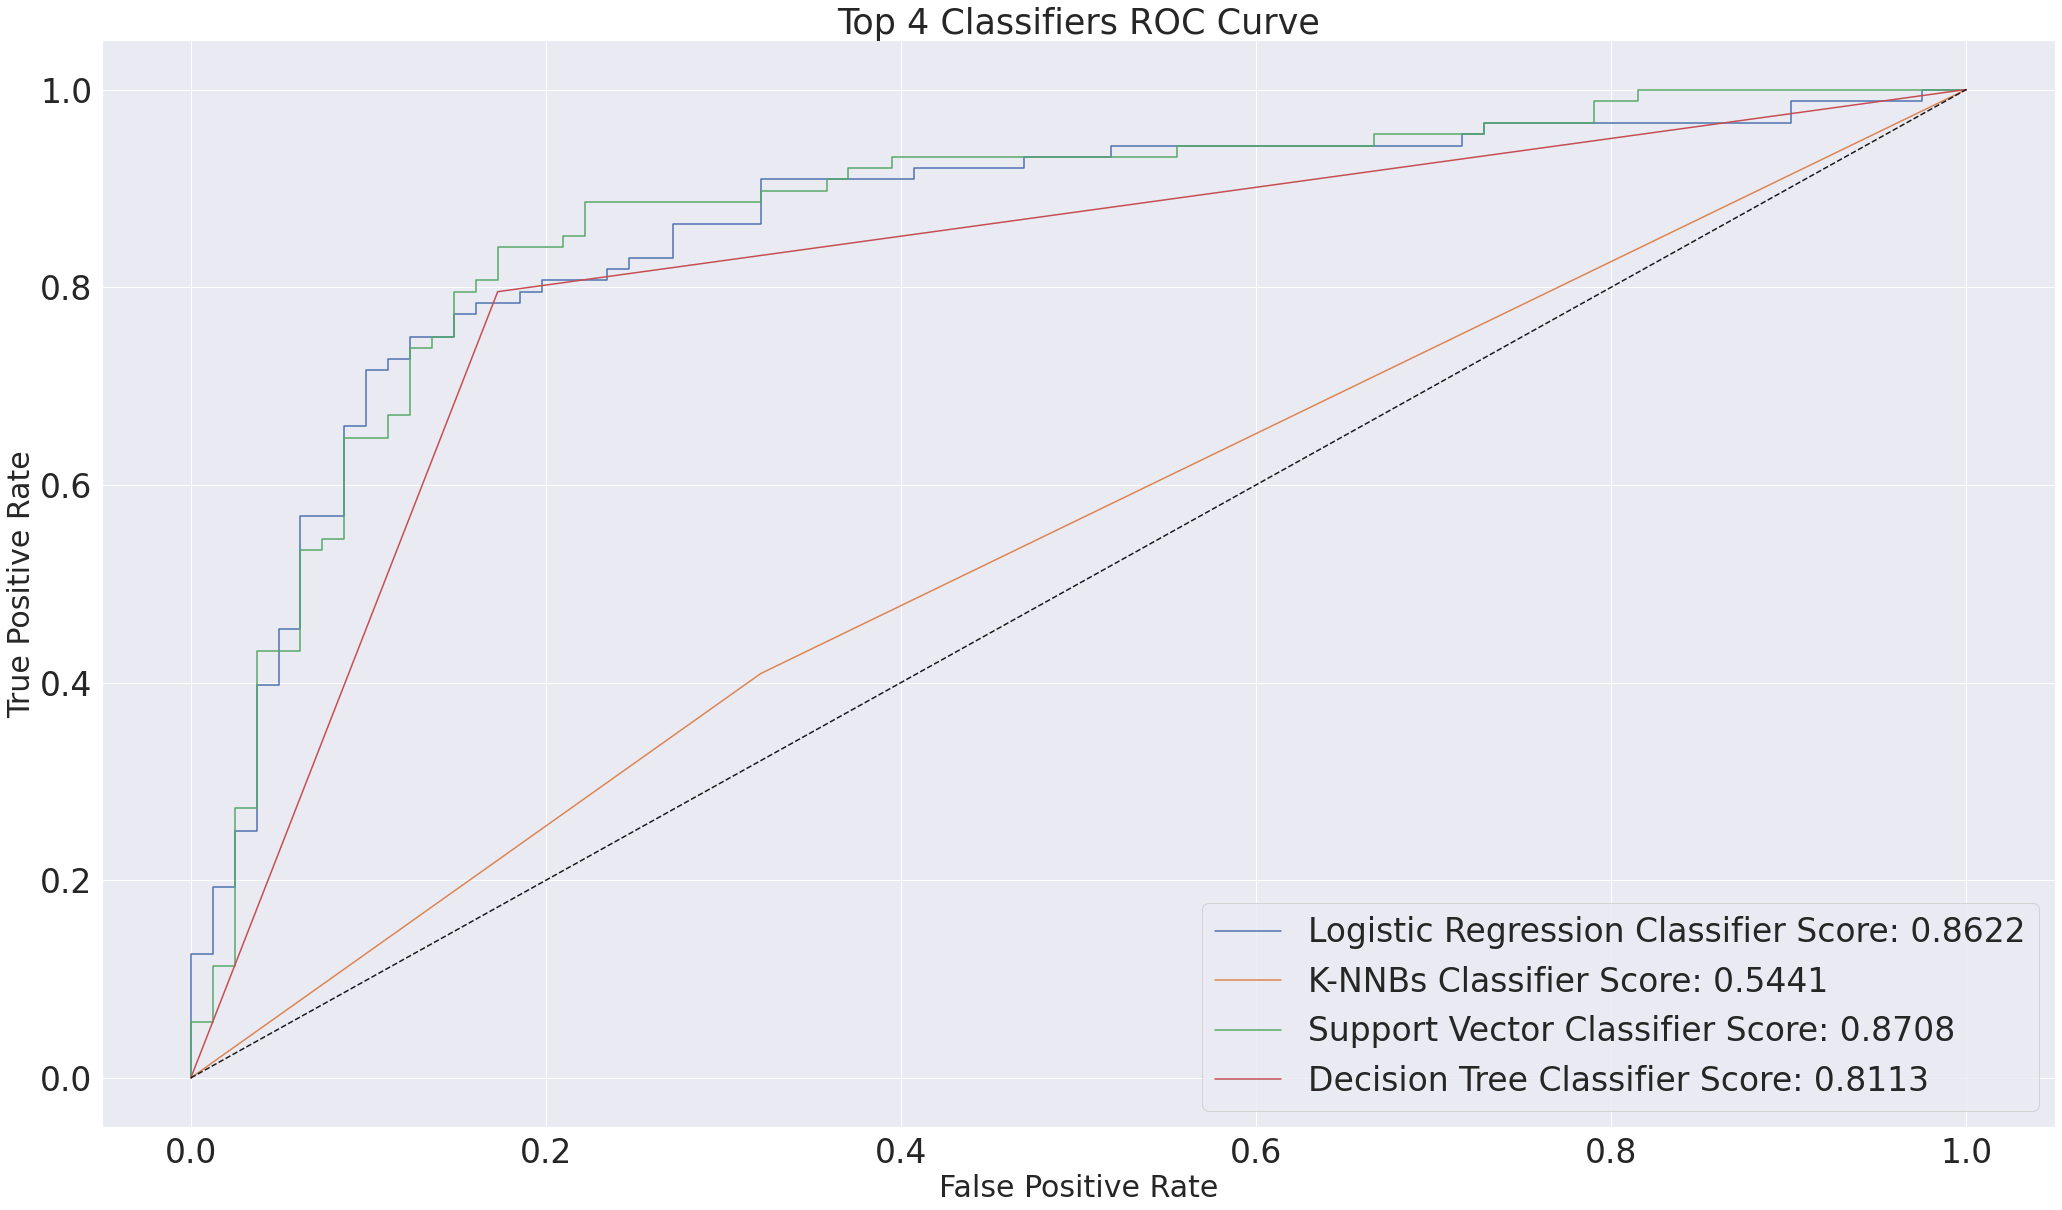

In [48]:
# fpr = false positive rate
# tpr = true positive rate
# roc = Receiving Operating Characteristic score

log_fpr, log_tpr, log_thresold = roc_curve(label_train, log_reg_pred)
knnb_fpr, knnb_tpr, knnb_threshold = roc_curve(label_train, knnb_pred)
svc_fpr, svc_tpr, svc_threshold = roc_curve(label_train, svc_pred)
tree_fpr, tree_tpr, tree_threshold = roc_curve(label_train, tree_pred)


def graph_roc_curve_multiple(log_fpr, log_tpr, knear_fpr, knear_tpr, svc_fpr, svc_tpr, tree_fpr, tree_tpr):
    plt.figure(figsize=(35,20))
    plt.title('Top 4 Classifiers ROC Curve', fontsize=35)
    plt.plot(log_fpr, log_tpr, label='Logistic Regression Classifier Score: {:.4f}'.format(roc_auc_score(label_train, log_reg_pred)))
    plt.plot(knnb_fpr, knnb_tpr, label='K-NNBs Classifier Score: {:.4f}'.format(roc_auc_score(label_train, knnb_pred)))
    plt.plot(svc_fpr, svc_tpr, label='Support Vector Classifier Score: {:.4f}'.format(roc_auc_score(label_train, svc_pred)))
    plt.plot(tree_fpr, tree_tpr, label='Decision Tree Classifier Score: {:.4f}'.format(roc_auc_score(label_train, tree_pred)))
    plt.plot([0, 1], [0, 1], 'k--') # minimum ROC score of 50%
    plt.xlabel('False Positive Rate', fontsize=30)
    plt.ylabel('True Positive Rate', fontsize=30)
    plt.legend()
    
graph_roc_curve_multiple(log_fpr, log_tpr, knnb_fpr, knnb_tpr, svc_fpr, svc_tpr, tree_fpr, tree_tpr)
plt.show()

## very close results between LR and SVM

## Logistic Regression

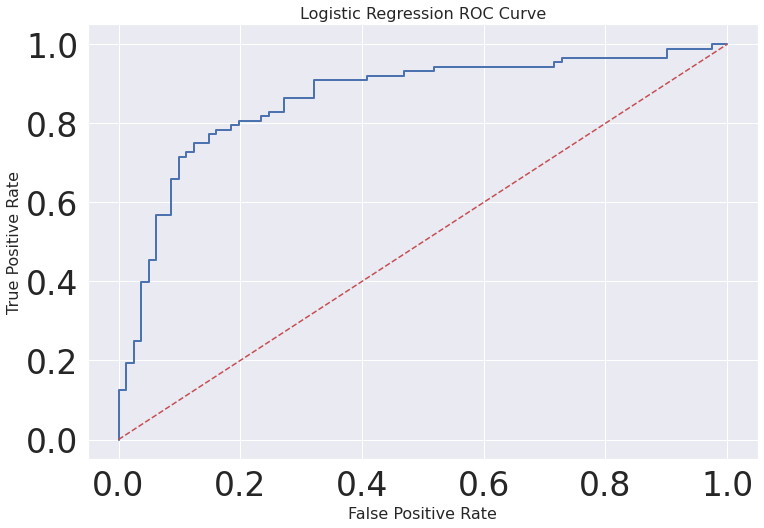

In [49]:
def logistic_roc_curve(log_fpr, log_tpr):
    plt.figure(figsize=(12,8))
    plt.title('Logistic Regression ROC Curve', fontsize=16)
    plt.plot(log_fpr, log_tpr, 'b-', linewidth=2)
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
  
logistic_roc_curve(log_fpr, log_tpr)
plt.show()

In [77]:
precision, recall, threshold = precision_recall_curve(label_train, log_reg_pred)

label_pred = log_reg.predict(feature_train)

In [80]:
from tabulate import tabulate
print(tabulate([['Accuracy', accuracy_score(label_train, label_pred), np.mean(undersample_accuracy)]\
                , ['Precision', precision_score(label_train, label_pred), np.mean(undersample_precision) ],\
               ['Recall', recall_score(label_train, label_pred), np.mean(undersample_recall)],\
                ['F1', f1_score(label_train, label_pred), np.mean(undersample_f1)]\
               ], headers=['metric', 'balanced data', 'imbalanced data']))

metric       balanced data    imbalanced data
---------  ---------------  -----------------
Accuracy          0.816568           0.851152
Precision         0.835294           0.2875
Recall            0.806818           0.11234
F1                0.820809           0.161152
